# Attribution
This is taken from several sources, largely
##### "Hands-On Machine Learning with SciKit-Learn and TensorFlow" by A. Geron
##### "Python Machine Learning" by S. Raschke
##### "Deep Learning" by I. Goodfellow, Y. Bengio, and A. Courville
##### Wikipedia.org
##### The inimitable www.google.com

[Introduction to Linear Regression](#Introduction-to-Linear-Regression)
- [Linear](#Linear)
- [Regression](#Regression)
- [The Normal Equation versus Successive Approximation](#The-Normal-Equation-versus-Successive-Approximation)
- [At Last - Code](#At-Last---Code)
- [Plot the Generated Data](#Plot-the-Generated-Data)
- [Best Fit with Normal Equation](#Best-Fit-with-Normal-Equation)
- [Use the Best Fit to Make Predictions](#Use-the-Best-Fit-to-Make-Predictions)
- [Not Fair! Now use Successive Approximation!](#Not-Fair!-Now-use-Successive-Approximation!)
- [Here Comes the Math](#Here-Comes-the-Math)
- [Alrighty then - let's SciKit-Learn](#Alrighty-then---let's-SciKit-Learn)
- [Learning Rate - a HyperParameter](#Learning-Rate---a-HyperParameter)
- [Multivariate Regression - say goodbye to linear!](#Multivariate-Regression---say-goodbye-to-linear!)
- [Try this with your linear regression!!!](#Try-this-with-your-linear-regression!!!)
- [Wow! that looks great! What could possibly go wrong?](#Wow!-that-looks-great!-What-could-possibly-go-wrong?)
- [Underfitting - when the model does not have enough complexity to fit the data...](#Underfitting---when-the-model-does-not-have-enough-complexity-to-fit-the-data...)
- [Overfitting - when the model has more complexity than the underlying data...](#Overfitting---when-the-model-has-more-complexity-than-the-underlying-data...)
- [Feature Engineering and the Curse of Dimensionality](#Feature-Engineering-and-the-Curse-of-Dimensionality)
- [Dimensionality Reduction](#Dimensionality-Reduction)
- [Wow - this all fits with Google Causal Impact that we saw earlier](#Wow---this-all-fits-with-Google-Causal-Impact-that-we-saw-earlier)

# Introduction to Linear Regression

### Wikipedia

Time to quit prevaricating about the bush:

##### In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X. The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. (This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.)


### Linear


Linear Regression (a special case of regression) takes a single value or set of values (think X)
and calculates a prediction (think $\hat y$ - the hat means estimate) with the formula:

$\hat y$ = $\hat a$X + $\hat b$

This is a Linear prediction (a straight line); it assumes that the real (and the training) data is generated from a true underlying "model" such as:

y = aX + b + noise

Note that the true underlying model uses "a" and "b" since those are the TRUE values, while the prediction uses "$\hat a$" and "$\hat b$" since those are ESTIMATES of the true values.

Usually a and b are written as ${\theta}_1$ and ${\theta}_0$ respectively and the equation is re-ordered:

$\hat y$ = $\hat {\theta}_0$ + $\hat {\theta}_1$X

y = ${\theta}_0$ + ${\theta}_1$X + noise

Why would we do this when the aX + b form is so familiar? Because we will soon see cases of Linear Regression applied to data using higher degrees of X - this technique is called Multinomial Regression. For these types of equations we don't want to run out of "a"s and "b"s. Here is an example of a quadratic form Multinomial Regression model:

y = ${\theta}_0$ + ${\theta}_1$X + ${\theta}_2$$\mathrm{X}^{2}$ + noise

Another variation is that X is not necessarily just one dimension, it can be a vector with as many dimensions (or features) as desired. For instance when we looked at housing data it had features such as median income in the area, number of people in the area, number of bedrooms in the house, etc. Because there are multiple "x"s, that is called multivariate linear regression.


### Regression

For Artificial Intelligence, Regression is often used to predict a value (scalar or vector) based on the input data point (aka the explanatory variable(s), which could be scalar or vector). This is done by first calculating the desired parameters of the model, then using these parameters in the model equation to transform the input data point into the prediction.

But how do we calculate the model parameters, and what do we use to decide that one set of model parameter values is better than a different set? 

The parameter values ${\theta}_0$ and ${\theta}_1$ are calculated to optimize the prediction compared to the training data using some criteria decided ahead of time.

Typical criteria might be RMSE (Root Mean Squared Error).

RMSE = $\sqrt{\mathrm{\sum(y - \hat y)}^{2}}$

Normally it is mathematically easier to deal with MSE (Mean Squared Error) and minimizing this will also minimize RMSE.

MSE = $\mathrm{\sum(y - \hat y)}^{2}$

There can be different criteria...


## The Normal Equation versus Successive Approximation

For a simple system like this, we can actually calculate the answer directly given any particular example of training data (the examples of X and resulting actual y). You can look up the math easily, it is called the Normal Equation for Simple Linear Regression. Excel even has a way to calculate and plot this automatically.

However, later we will be dealing with systems of equations that do not have a closed form solution, so we are more interested in how we would solve this without being able to directly calculate the answer. This is known as finding the regression coefficients using successive approximation.

### At Last - Code

In [1]:
# Finding the regression coefficients using normal equation versus successive approximation
#
# Below line is to support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    return # for now we will not save the plots
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)


In [2]:
# let's generate some data - 100 data points
#
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### Plot the Generated Data

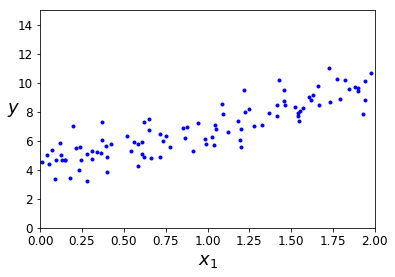

In [3]:
# Now let's look at it
#
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

### Best Fit with Normal Equation

In [4]:
# calculate the best fit straight line to minimize MSE (Linear Regression with MSE)
#    using the Normal Equation
# as part of this we will use the "inv" function to invert a matrix
#
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

##### Hmmm

The underlying model (as you saw above) was

y = 4.000 + 3.000X + noise

The calculated result from above and restated below may change depending on the initialization of the random number generator but when I did it, it looked like this

$\hat y$ = 4.215 + 2.770X + NoNoise

Not perfect!!! Based on 100 training sample points and a fairly large noise injection, this is as good as we can do. Remember, this was the direct calculation of parameters for the minimum MSE so it is the exact minumum Mean Standard Error!

##### Let's Make some Predictions

Now we have the parameters, let's predict a start and end point of our model line and plot the predict line versus the training data.

For the training data, X goes from [0, 2] so let's make predictions at those endpoints.

### Use the Best Fit to Make Predictions

[[ 1.  0.]
 [ 1.  2.]]
Y-values for [[0], [2]] are:
[[ 4.21509616]
 [ 9.75532293]]

Red line is Simple Linear Regression Prediction
Green line is True model.


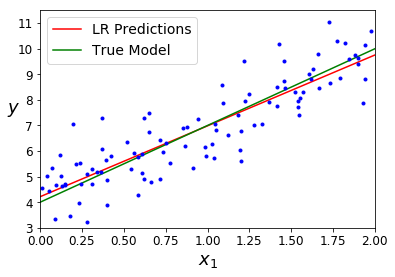

In [5]:
# X_new contains the endpoints [0,2]. X_new_b puts them in a form we can use to do the calcs
#    we use a dot-product for the calculation
#
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_true = [[4], [10]]
print("Y-values for [[0], [2]] are:\n%s\n\nRed line is Simple Linear Regression Prediction\nGreen line is True model." % y_predict)
plt.plot(X_new, y_predict, "r-", label="LR Predictions")
plt.plot(X_new, y_true, "g-", label="True Model")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 3, 11.5])
plt.show()

### Not Fair! Now use Successive Approximation!

OK I did say we won't go too far into the Normal Equation and that Successive Approximation is the key to the success (ha ha! that's a pun!) of Machine Learning recently.

You recall that when you want to find the minimum or maximum of a function you will find it where the derivative or slope of the function is  zero.

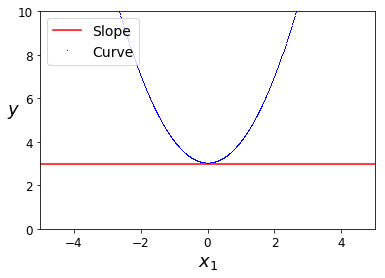

In [6]:
# Let's show a case of the minimum point being at zero slope
X_q = np.arange(-5, 5, 0.01)
y_q = np.empty(shape=(len(X_q)))
for idx in range(len(X_q)):
   y_q[idx] = X_q[idx]*X_q[idx] + 3.0
X_slope = [[-5], [5]]
y_slope = [[3], [3]]
plt.plot(X_slope, y_slope, "r-", label="Slope")
plt.plot(X_q, y_q, "b,", label="Curve")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-5, +5, 0, 10])
plt.show()

### Here Comes the Math

##### What they didn't tell you about Derivatives

(not the financial market kind)

Great! Just find zeros of the derivative of the curve to find minima and maxima.

You are familiar with derivatives of a continuous function of one variable generating a result of one variable such as:

y = ${\theta}_0$ + ${\theta}_1x$ + ${\theta}_2$$\mathrm x^{2}$

... or even an infinite series such as:

y = $\sum_{i=0}^{\infty} {{\theta}}_i x^{i}$

##### Vector and Tensor Equations

If the "x" in these equations is not a scalar but instead a vector "${X}$" (or more generally a tensor) then the ${\theta}$ terms must also become a tensor, in the other direction compared to ${X}$, so the dot product result is a scalar. Here is an example:

${f}_2({X})$ = ${\theta}_2$$\mathrm{X}^{2}$

Where:

$ \begin{equation*}
{\theta}_2 = \begin{vmatrix}
{\theta}_{2,0}\\
{\theta}_{2,1}\\
{\theta}_{2,2} \end{vmatrix}
= \begin{vmatrix}
1\\
2\\
3 \end{vmatrix}
\end{equation*}$

$\begin{equation*}
{X} = \begin{vmatrix}
x_0 & x_1 & x_2 \end{vmatrix}
\end{equation*}$

Performing the dot products:

${f}_2({X})$ = $\sum_{i=0}^{2} {\theta}_{2,i} {x_i}^{2}$ = ${\theta}_{2,0} {x_0}^{2}$ + ${\theta}_{2,1} {x_1}^{2}$ + ${\theta}_{2,2} {x_2}^{2}$

Because ${X}$ is a vector/tensor, ${f}_2({X})$ does not have a simple derivative. It has a "total" derivative which can get quite complicated as the equations get more complicated. There is also a "partial" derivative which is used all the time in machine learning. Fortunately the partial derivative is the easiest to calculate!

The partial derivative of ${f}_2({X})$ with respect to the "$x_i$" part of the vector/tensor ${X}$ is denoted $\frac{\partial {f}_2}{\partial x_i}$.

To calculate this partial derivative, you hold everything else including the other $x_j$ as constant and then take the derivative with respect to just the $x_i$ of interest. This tells you the slope of the curve in the direction of "just that part" of ${X}$. For instance:

$\frac{\partial {f}_2}{\partial x_0}$ = $\frac{\partial ({\theta}_{2,0} {{X}_0}^{2} + constant)}{\partial x_0}$ = $2 {\theta}_{2,0} x_0$

$\frac{\partial {f}_2}{\partial x_1}$ = $2 {\theta}_{2,1} x_1$

$\frac{\partial {f}_2}{\partial x_2}$ = $2 {\theta}_{2,2} x_2$


##### That was easy but not useful...

It is interesting to see the partial derivative with respect to $x_0$. However, nobody really cares how ${\hat y}$ changes with respect to $x_0$. What we care about is: how does the MSE change with respect to ${\theta}_{2,0}$? That would tell us if we wanted to adjust ${\theta}_{2,0}$ to be a little bit bigger or a little bit smaller to make the MSE get smaller.

##### Let's make it useful...

Remember that Mean Squared Error is:

MSE = $\mathrm{\sum(y - \hat y)}^{2}$

For our example, 

${\hat y}$ = ${f}_2({X})$ = $\sum_{i=0}^{2} {\theta}_{2,i} {x_i}^{2}$ = ${\theta}_{2,0} {x_0}^{2}$ + ${\theta}_{2,1} {x_1}^{2}$ + ${\theta}_{2,2} {x_2}^{2}$

Then:

$\frac{\partial {MSE}}{\partial {\theta}_{2,0}}$ = $\frac{\partial ([y - \sum_{i=0}^{2} {\theta}_{2,i} {x_i}^{2}]^{2})}{\partial {\theta}_{2,0}}$ = argh!!!

In reality we will see that even for simple regression we will often use multiple functions ${f}_j({X})$ so we get:

$\frac{\partial {MSE}}{\partial {\theta}_{2,0}}$ = $\frac{\partial ([y - \sum_{j=0}^{K} \sum_{i=0}^{N} {\theta}_{j,i} {x_i}^{j}]^{2})}{\partial {\theta}_{2,0}}$ = ARGH!!!

And remember that we must do this for all the training data points - for all the ${X}_k$ - and combine the results to make one partial derivative so we can adjust ${\theta}$ - AAARRRGGGHHH!!!


###### Saved by the bells!

This is starting to look a little messy. Not impossible, but you can see that anything other than the simple cases will be ... not simple!

... (and I was getting a little sloppy with the math, so I need to retreat from this)

Fortunately, we are saved by three bells:

###### (1) Those clever Machine Learning people did that already

Unless you are planning on getting a Ph.D. in Artificial Intelligence, you won't be working out these partial differentials. The libraries we use (SciKit-Learn and TensorFlow) and other libraries have already put in correct code to satisfy almost all cases that are normally used. The hard work is done for you!

###### (2) They are cleverer (...ererer) than that! TensorFlow will figure out YOUR partial differentials

As we will see a little bit later, if you want to use non-standard equations you give TensorFlow the information to figure out your equations and the partial derivatives - it does the hard work for you!

There is a fantastic description of how this works in Appendix D of the book "Hands-On Machine Learning with SciKit-Learn and TensorFlow" by A. Geron. Some really beautiful mathematics!

###### (3) We could have just approximated it anyway - it just wouldn't be as accurate or efficient

You can always approximate a derivative of a function at a point by calculating the function value at two nearby points and then calculating the slope of the resultant line. This approximation technique was used in Artificial Intelligence before the algorithm for automatic differentiation was known. It works but slower and not as beautiful.

##### OK find the zeros of the derivative - how do we do that?

Not quite the same but ... remember in the Newton-Rhapson method where you calculate the slope, extend the slope out to some point (usually y=0) then re-evaluate at that point and gradually move to the zero-crossing point.

##### Gradient Descent

The Newton-Rhapson algorithm is an example of gradient descent, where we follow the gradient (slope) in increments to get to the point we are searching for.



### Alrighty then - let's SciKit-Learn

#####  ... and Approximate Approximate Approximate!

Going back to the original ${X}$ and $y$, let's see what it takes to get SciKit-Learn to do a Linear Regression fit and see if the intercept and slope agree with the normal equation

In [7]:
from sklearn.linear_model import LinearRegression # imports to learn how to call and use Linear Regression
lin_reg = LinearRegression()       # lin_reg is a Linear Regression object
lin_reg.fit(X, y)                  # call the "fit" method of lin_reg with our X and y
print(lin_reg.intercept_, " ", lin_reg.coef_) # show the result

[ 4.21509616]   [[ 2.77011339]]


In [8]:
# Just 3 lines to do the job, one to print the results!!!

# Now how would we predict a particular point for some X value? They have a way to do that
# remember that X_new has X values of 0 and 2 so we can plot a line of the predictions

y_hat = lin_reg.predict(X_new) # call the "predict" method of lin_reg with our X_new
print("X_new is\n", X_new, "\nPredicted y is\n", y_hat) # show the result

X_new is
 [[0]
 [2]] 
Predicted y is
 [[ 4.21509616]
 [ 9.75532293]]


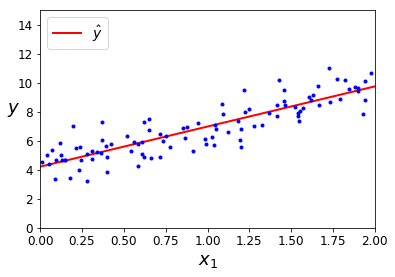

In [9]:
# by now this code to produce a plot might be looking familiar...

plt.plot(X_new, y_hat, "r-", linewidth=2, label="${\hat y}$")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("SciKit-Learn Predictions")
plt.show()

### Learning Rate - a HyperParameter

We need to be careful not to take steps too large or we may just hop back and forth across the point we seek. Many algorithms have a step size that can be specified. The SciKit-Learn LinearRegression() algorithm works on such a well-formed problem that this is not needed, but once we get to more complicated regressions many will have such a capability. When available, the "step size" is known as the Learning Rate and is an example of a "Hyperparameter". A Hyperparameter is a feature of the algorithm that controls the algorithm and needs to be set to a workable value by your intuition, experience, or by experiment.

In the case of Learning Rate, if set to small (low) then it takes a long time to reach the answer. If set too large (high) then we can bounce around and never stop near the answer.

The learning rate is usually multiplied by the slope with respect to each ${\theta}_i$ in turn to determine how far to move that ${\theta}_i$.

The following graph tries to illustrate this effect. The green dots take such big steps they just bounce around back and forth (unrealistically they go back and forth to the exact same spot). The red dots move slowly and converge on the minimum.

Learning Rate Step Size effect
   Illustration not completely accurate


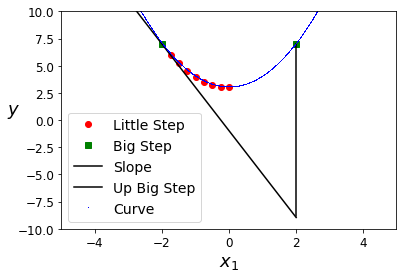

In [10]:
# let's show Learning Rate too large - and not too large.
# This is an illustration not completely accurate
print("Learning Rate Step Size effect\n   Illustration not completely accurate")
X_q = np.arange(-5, 5, 0.01)
y_q = np.empty(shape=(len(X_q)))
for idx in range(len(X_q)):
   y_q[idx] = X_q[idx]*X_q[idx] + 3.0
idxmiddle = int(len(X_q)/2)+1
idx_1_5 = int(len(X_q)/5)
X_trybig = [[X_q[idxmiddle-idx_1_5]], [X_q[idxmiddle+idx_1_5]]]
y_trybig = [[y_q[idxmiddle-idx_1_5]], [y_q[idxmiddle+idx_1_5]]]
xtnd = 4.0 # how far to stick out to the right
X_slopebig = [[X_trybig[0][0]-1.0], [X_trybig[0][0]+xtnd]]
y_slopebig = [[y_trybig[0][0]-2*X_trybig[0][0]], [y_trybig[0][0]+2*xtnd*X_trybig[0][0]]]
X_upbig = [[X_trybig[1][0]], [X_trybig[1][0]]]
y_upbig = [[y_trybig[1][0]], [-8.8]]
X_trysmall = []
y_trysmall = []
idx_small = int(idx_1_5/8)
for idx in range(idxmiddle-idx_1_5, idxmiddle+2, idx_small):
    X_trysmall.append(X_q[idx])
    y_trysmall.append(y_q[idx])
plt.plot(X_trysmall, y_trysmall, "ro", label="Little Step")
plt.plot(X_trybig, y_trybig, "gs", label="Big Step")
plt.plot(X_slopebig, y_slopebig, "k-", label="Slope")
plt.plot(X_upbig, y_upbig, "k-", label="Up Big Step")
plt.plot(X_q, y_q, "b,", label="Curve")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="lower left", fontsize=14)
plt.axis([-5, +5, -10, 10])
plt.show()

### Multivariate Regression - say goodbye to linear!

Regression will find a best match for a linear combination of the variable(s) you give it plus a constant. But you can create additional variables that are non-linear combinations of the existing variables. For instance if you have a simple variable x, you can create additional "variables" ${x}^{2}$, ${x}^{3}$, etc. Then the "linear" regression can find a fit - for example a least-squares fit - for a quadratic or a cubic or higher order equation.

For instance, consider the following curve:

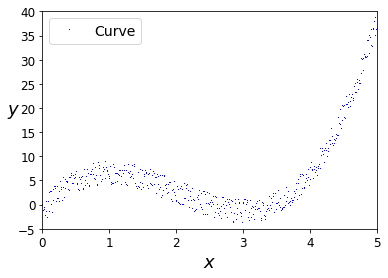

In [11]:
x = np.arange(0, 5, 0.01)
y_q = np.empty(shape=(len(x)))
noise = np.random.rand(1000, 1)*5
for idx in range(len(x)):
   y_q[idx] = (x[idx] -1)*(2*x[idx]-2)*(x[idx]-4) + 4.0 + noise[idx]
plt.plot(x, y_q, "b,", label="Curve")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, +5, -5, 40])
plt.show()

### Try this with your linear regression!!!

If we give the linear regression ${X}_i$ = ${x}^{i}$ for i = 1, 2 and 3...

similar to our previous example but in a slightly different form

${\hat y}$ = ${\hat \theta}_{0}$ + $\sum_{i=1}^{3} {\hat \theta}_{i} {X_i}$ = ${\hat \theta}_{0}$ + ${\hat \theta}_{1} {X_1}$ + ${\hat \theta}_{2} {X_2}$ + $\hat {\theta}_{3} {X_3}$

We can solve for ${\hat \theta}_{i}$ to minimize the RMSE

Multiplying out our example, this is what we are looking for:

$y$ = ($x$ -1) * (2 $x$ - 2) * ($x$ - 4) + 4

$y$ = -4 + 18 ${x}$ - 12 ${x}^{2}$ + 2 ${x}^{3}$ + noise

-1.34430646169   [ 17.89240891 -11.95583916   1.99154582]


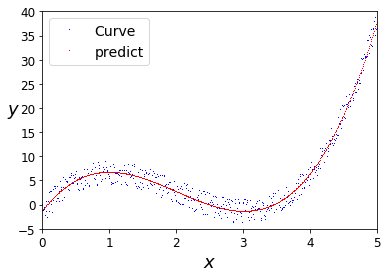

In [12]:
from sklearn.linear_model import LinearRegression

X_q = np.empty(shape=(len(x),3))
for idx in range(len(x)):
    X_q[idx] = (x[idx], x[idx]**2, x[idx]**3)
lin_reg = LinearRegression()
lin_reg.fit(X_q, y_q)
y_hat = lin_reg.predict(X_q)
plt.plot(x, y_q, "b,", label="Curve")
plt.plot(x, y_hat, "r,", label="predict")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5, -5, 40])
print(lin_reg.intercept_, " ", lin_reg.coef_) # show the linear regression resulting theta coefficients
plt.show()

### Wow! that looks great! What could possibly go wrong?

$y$ = -4 + 18 ${x}$ - 12 ${x}^{2}$ + 2 ${x}^{3}$ + noise

${\hat y}$ = -1.44 + 17.82 ${x}$ - 11.83 ${x}^{2}$ + 1.97 ${x}^{3}$

##### That looks really good...

It captured the coefficients of ${x}$ quite well. It missed the intercept but got the general nature of the curve!

Well there are always the classic dangers of underfitting and overfitting.

### Underfitting - when the model does not have enough complexity to fit the data...

Below is what happens when we try to fit an order-2 polynomial onto our order-3 data. Linear Regression gives a curve with close to the minimum RMSE, but it is obviously not right and would not "generalize" well at all - in other words, it probably gives wildly wrong answers if we try to apply it in regions that are not in the interval where we had training data.

10.9540360774   [-11.83163158   2.95088133]


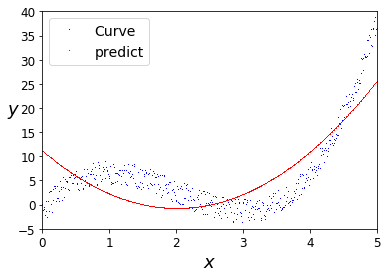

In [13]:
X_q = np.empty(shape=(len(x),2))
for idx in range(len(x)):
    X_q[idx] = (x[idx], x[idx]**2)
lin_reg = LinearRegression()
lin_reg.fit(X_q, y_q)
y_hat = lin_reg.predict(X_q)
plt.plot(x, y_q, "b,", label="Curve")
plt.plot(x, y_hat, "r,", label="predict")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5, -5, 40])
print(lin_reg.intercept_, " ", lin_reg.coef_) # show the linear regression resulting theta coefficients
plt.show()

### Overfitting - when the model has more complexity than the underlying data...

##### ... so it starts fitting the noise or some coincidences

Especially likely with a small amount of training data and enough model complexity (in this case, high enough polynomial order) to start fitting the curve through individual training points even though the training points contain noise or other effects by coincidence (such as goats standing on green grass).

Overfitted models also do not "generalize" well. As seen below, it probably gives wildly wrong answers if we try to apply it in regions that are not in the interval where we had training data. More than that, it gives what we know to be wildly wrong answers in the interval where we do have training data, even though it is probably very accurate on the exact points we gave it.

0.757494966679   [  2.03974862e+00   1.71469768e+00   1.31006560e+00   8.06840001e-01
   2.63713090e-01  -2.33162269e-01  -5.61082950e-01  -5.97871666e-01
  -3.06679144e-01   1.64297321e-01   4.71174682e-01   2.94086643e-01
  -2.37969040e-01  -4.14939037e-01   1.61277674e-01   3.97391384e-01
  -4.64376826e-01   2.42086425e-01  -7.48020833e-02   1.45844812e-02
  -1.77254187e-03   1.23240468e-04  -3.75715479e-06]


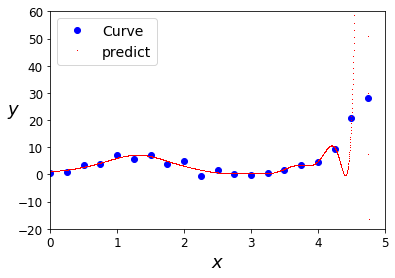

In [14]:
def calc_poly_vector(poly_order, x_input_val):
    X_output_vector = []
    x_next_poly = 1.0
    for poly in range(poly_order):
        x_next_poly *= x_input_val
        X_output_vector.append(x_next_poly)
    return X_output_vector

x = np.arange(0, 5, 0.25)
y_q = np.empty(shape=(len(x)))
noise = np.random.rand(5000, 1)*5
for idx in range(len(x)):
   y_q[idx] = (x[idx] -1)*(2*x[idx]-2)*(x[idx]-4) + 4.0 + noise[idx]

lin_reg_poly_order = 23
X_q = np.empty(shape=(len(x),lin_reg_poly_order))
for idx in range(len(x)):
    X_q[idx] = calc_poly_vector(lin_reg_poly_order, x[idx]).copy()

x_pred = np.arange(0, 5, 0.0025)
X_qpred = np.empty(shape=(len(x_pred),lin_reg_poly_order))
for idx in range(len(x_pred)):
    X_qpred[idx] = calc_poly_vector(lin_reg_poly_order, x_pred[idx]).copy()

lin_reg = LinearRegression()
lin_reg.fit(X_q, y_q)
y_hat = lin_reg.predict(X_qpred)
plt.plot(x, y_q, "bo", label="Curve")
plt.plot(x_pred, y_hat, "r,", label="predict")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, +5, -20, 60])
print(lin_reg.intercept_, " ", lin_reg.coef_) # show the linear regression resulting theta coefficients
plt.show()

### Feature Engineering and the Curse of Dimensionality

##### Augmenting the data can be a powerful technique

We have seen the use of Multinomial Regression to allow fitting (modeling) data that needs more power than a straight line fit. We have also seen how we can augment the data to have higher order terms as we did above by adding powers of the original data. In the housing project we saw how to augment the data by combining terms and thus creating new terms with more predictive power, such as dividing total_bedrooms by total_rooms to create bedrooms_per_room with more predictive power than both of the original terms.

Of course, as we have just shown, care must be taken to avoid underfitting and overfitting.

As a point of further investigation, you can look for information on something called "the kernal trick". Using this method, you can have the model train "as if" you had calculated lots of extra new terms to add to the sample data without actually having to compute those terms. You can even have it work as if there were an infinite number of terms.

##### The Curse of Dimensionality

However, there can be problems with augmenting each sample point to create samples with thousands of terms or "features" in addition to the problems discussed above.

One obvious problem is the additional computation needed and thus time needed to train and to use the model.

More fundamentally, adding dimensions to the data has the characteristic of making the data more sparse. We had already mentioned how sparse data can contribute to overfitting.

You can see this dimension/sparseness relation intuitively by thinking of the synthetic example we examined above: when we had one dimension of data, we had a certain number of points for the range of [0, 5]. As we went to including the powers of that original sample data, each time we added another power of the sample as a feature, the state space of the input data gained a dimension.

Intuitively, when we go from a line of length 5 inches to a square of side length 5 inches we go from 5 inches to 25 (or ${5}^{2}$) square inches. Adding another dimension takes us to 125 (${5}^{3}$) cubic inches. But if we started with a density of 500 data samples to cover our range of 5 in one dimension, we intuitively see that we would need something like ${500}^{2}$ samples to cover our range of ${5}^{2}$ in two dimensions with the same density, and something like ${500}^{3}$ samples for three dimensions of range ${5}^{3}$ with the same density.

However, we didn't add samples, we added dimensions to our existing samples. Thus our sample density became less (conversely, the sparseness of our data became greater) and this means that there is more "area" in our sample space for which we have no data. That is why when we overfit we see the model going all over the place but passing right through our data points: there is no penalty for the data going into regions for which we have no training samples.

In general, algorithmic learning with a larger number of features means that it will take longer for the learning to complete and that more (much more) training data is required to avoid overfitting, and if we don't get enough training data there is the danger that even in the region where we have training data we will be left with unexpected model behavior.

### Dimensionality Reduction

##### Amazingly, people have already thought of this!

Remember that we trained our model with RMSE, so the only thing it was optimizing for was how closely it matched our sample data points. We can change the optimization criteria to include terms that penalize for using non-zero coefficients on the many features (dimensions)! Then it would not only try to match the data points but also try to use as few features in each point as practical.

By adjusting these terms, you can make it more likely to try to drive one of two coefficients to zero than it is to have both coefficients at 0.5. This will tend to identify input features that have low value or are redundant to other features.

##### This techique is called dimensionality reduction.

I won't show examples here, but there are many available on the web.

### Wow - this all fits with Google Causal Impact that we saw earlier

##### Tying it all into the Google Causal Impact example we looked at earlier this year

In our earlier look at Google Causal Impact we saw that linear regression was used to predict what the current year data would have looked like without doing the event being analyzed (in the example from the podcast {see below}, the event was a band playing on the Saturday Night Live (SNL) TV show). In that example, this linear regression generated "counter-factual" data was compared to the actual data by use of Bayesion statistics to estimate the effect of the SNL appearance on the bands popularity judged by number of lookups on Wikipedia.

The example they showed used just the simplest approach on the linear regression because they were concentrating on the big picture and also the Bayesian statistics.

At the time we did our exercise earlier this year we didn't look too much at the regression part of this. Now we have a little better idea of the math behind it, and also of the power and pitfalls it can bring to our analysis.

##### Background on Google Causal Impact and our earlier project

We had an earlier AI project this year on Google's "Causal Impact", which is implemented in the "R" language. All the cool statistical kids are using the free and open source R language now.

Below is the email I sent to the kids to introduce this project. We basically just implemented Google's example and then discussed how to use it. Carl could immediately see how it applied to some of his projects.

Google Causal Impact would be extremely useful both in advertising and in financial projection.

Google Causal Impact is “an approach to estimating the causal effect of a designed intervention on a time series. For example, how many additional daily clicks were generated by an advertising campaign? Answering a question like this can be difficult when a randomized experiment is not available.”

There were two experiments. In the CausalImpact area there was a synthetic example. The podcast below did an example of the effect on popularity of a band after an appearance on the Saturday Night Live (SNL) TV show.

Here is a slightly-more-than 1/2 hour podcast that describes it pretty well from a non-mathematical point of view. I recommend listening to it even though it is <<< non mathematical >>>; it is also a pretty good introduction.

http://dataskeptic.com/blog/transcripts/2016/causal-impact

Here is where the code is. It is open-source so you can put it on your computer and experiment with it. Note that both addresses below give a different page.

https://google.github.io/CausalImpact/

https://google.github.io/CausalImpact/CausalImpact.html

Note that “R” is an widely-used open-source statistical package that you will need to install before installing Google Causal Impact. You will want to get somewhat familiar with this language anyway. Here is where you get it.

https://www.r-project.org/

Google Causal Impact is mostly based on Bayes theorem which I think you have seen. Bayes theorem “describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

For example, if cancer is related to age, then, using Bayes’ theorem, a person’s age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.”

https://en.wikipedia.org/wiki/Bayes'_theorem

Here is a paper describing the mathematics. Might be pretty hard slogging but worth taking a scan through.

https://research.google.com/pubs/pub41854.html

